<div class="alert bg-primary" style="text-align:center;"><font size="6"><b>Taksun PYNQ Example for FFT, DMA and GPIO </b></font></div>

  ## Contents
 * [VIVADO Project](#VIVADO-Project)
 * [import library](#import-library)
 * [Download Bit](#Download-Bit)
 * [VIVADO IPs](#VIVADO-IPs)
 * [Direct GPIO](#Direct-GPIO)
 * [Convert to GPIO](#Convert-to-GPIO)
 * [LED Binker](#LED-Binker)
 * [Read Keys](#Read-Keys)
 * [DMA Object](#DMA-Object)
 * [Get Memory](#Get-Memory)
 * [Generate Data](#Generate-Data)
 * [Play wave Sound](#Play-wave-Sound)
 * [Start DMA](#Start-DMA)
 * [Real Part of Result](#Real-Part-of-Result)
 * [abs of FFT Result](#abs-of-FFT-Resulty)
 * [20 Log of FFT Result](#20-Log-of-FFT-Result)


# VIVADO Project

![](block1.png)

# import library

In [1]:
from pynq import PL
from pynq import Overlay
from pynq.lib import AxiGPIO
from pynq.lib import dma
import math
import matplotlib.pyplot as plt
import time
import numpy as np
from pynq import Xlnk
from IPython.display import Audio

Xlnk = Xlnk()

# Download Bit
load FFT project bitstream file on PL

In [2]:
bit = "/home/xilinx/Overlay/fft.bit"
ol = Overlay(bit)

In [17]:
ol = Overlay(bit)

# VIVADO IPs
Show IPs in block diagram as python objects

In [4]:
ol.ip_dict.keys()

dict_keys(['axi_dma_0', 'led', 'sws'])

# Direct GPIO
Control RGB LED with 3 bits

In [5]:
ol.led.write(0,1)
time.sleep(0.2)
ol.led.write(0,2)
time.sleep(0.2)
ol.led.write(0,4)
time.sleep(0.2)
ol.led.write(0,0)
time.sleep(0.2)

# Convert to GPIO
Convert led and sws as GPIO pyhton objects

In [6]:
led_IP = ol.ip_dict['led']
led = AxiGPIO(led_IP).channel1
key_ip = ol.ip_dict['sws']
key = AxiGPIO(key_ip).channel1

# LED Binker
 5 time blink RGB led

In [7]:
for x in range(5):
    led.write(7,7)
    time.sleep(0.2)
    led.write(0,7)
    time.sleep(0.2)

# Read Keys

In [8]:
for x in range(5):
    a = key.read()
    print('Keys = ' + str(a))
    time.sleep(0.5)

Keys = 12
Keys = 12
Keys = 12
Keys = 12
Keys = 12


# DMA Object

In [9]:
dma_ip = ol.ip_dict['axi_dma_0']
dma_send = ol.axi_dma_0.sendchannel
dma_recv = ol.axi_dma_0.recvchannel

# Get Memory
Get Memory for Buffer with Complex int16 for DMA Transfer

In [10]:
inputBuf = Xlnk.cma_array(shape=(2,1024),dtype=np.int32)
FFTBuf = Xlnk.cma_array(shape=(2,1024),dtype=np.int32)

# Generate Data
generate Sinus wave form and plot and play

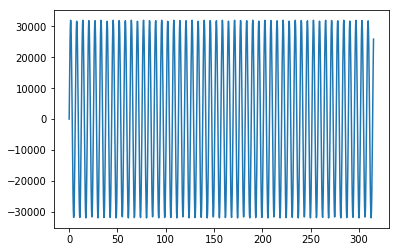

In [11]:
t = np.linspace(0,100.3*np.pi,1024);
inputBuf[0,:]= np.int16(32000*np.sin(t))
   
plt.plot(t,inputBuf[0,:])
plt.show()

# Play wave Sound

In [12]:
framerate = 22000
Audio(inputBuf[0,:],rate=framerate)

# Start DMA

In [13]:
dma_recv.transfer(FFTBuf)
dma_send.transfer(inputBuf)
dma_send.wait()
ol.led.

# Real Part of Result

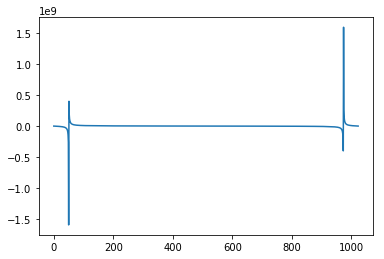

In [14]:
plt.plot(FFTBuf[0,:])
plt.show()

#  abs of FFT Result

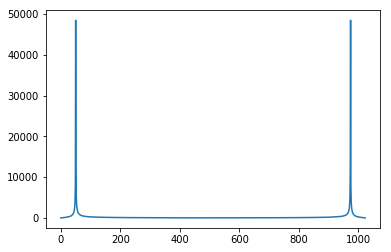

In [15]:
buf_abs =np.sqrt(np.power(FFTBuf[0,:]/32768,2,dtype=np.float32) + np.power(FFTBuf[1,:]/32768,2,dtype=np.float32))
plt.plot(buf_abs)
plt.show()

# 20 Log of FFT Result

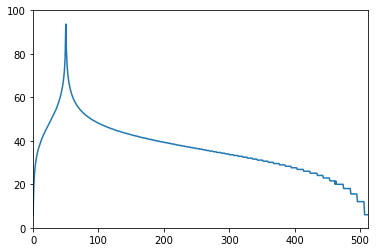

In [16]:
buf_abs_log = 20 * np.log10(buf_abs);
plt.ylim(0, 100)
plt.xlim(0, 512)
plt.plot(buf_abs_log)
plt.show()

[Contents](#Contents)